# Distribuciones en forma de anillo

In [1]:
from math import sin, cos, radians, pi, sqrt
import numpy.random as rnd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def ring(r_min=0, r_max=1, n_samples=360):
    angle = rnd.uniform(0,2*pi, n_samples)
    distance = rnd.uniform(r_min,r_max, n_samples)
    data = []
    for a , d in zip(angle, distance):
        data.append([d*cos(a),d*sin(a)])
    return np.array(data)

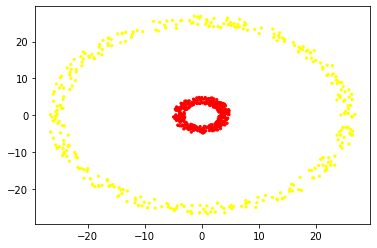

In [3]:
data1 = ring(3,5)
data2 = ring(24,27)

data = np.concatenate([data1, data2],axis=0)
labels = np.concatenate([[0 for i in range(0, len(data1))],[1 for i in range(0,len(data2))]])
plt.scatter(data[:,0],data[:,1],c=labels,s=5,cmap="autumn")

## Algoritmo con Kmeans

In [4]:
from sklearn.cluster import KMeans

In [5]:
km = KMeans(2).fit(data)

In [6]:
clust = km.predict(data)

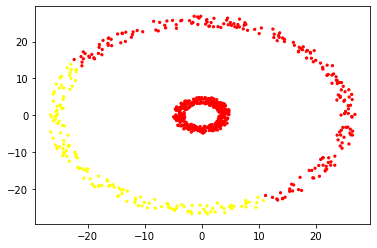

In [7]:
plt.scatter(data[:,0],data[:,1],c=clust,s=5,cmap="autumn")

## Algoritmo de los K-Medoides

In [8]:
from pyclust import KMedoids

In [10]:
Kmed = KMedoids(2).fit_predict(data)

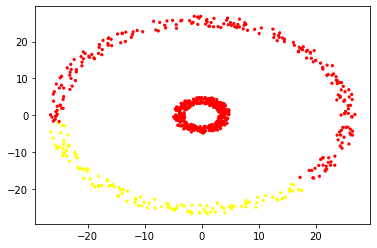

In [11]:
plt.scatter(data[:,0],data[:,1],c=Kmed,s=5,cmap="autumn")

## Algoritmo del Clustering espectral

In [13]:
from sklearn.cluster import SpectralClustering

In [14]:
clust = SpectralClustering(2).fit_predict(data)

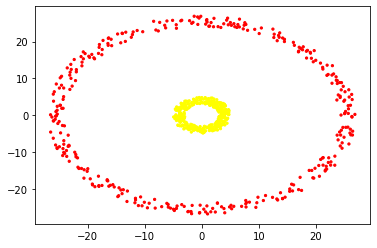

In [15]:
plt.scatter(data[:,0],data[:,1],c=clust,s=5,cmap="autumn")

* Podemos estimar k:
    * No: Propagación de la afinidad
    * Si: Podemos usar la distancia Euclídea:
        * Si: K-Means
        * No: Buscar valores centrales:
            * Si: K-Medoides
            * No: Los datos son linealmente separables:
                * Si: Clustering aglomerativo
                * No: Clustering espectral
                